<a href="https://colab.research.google.com/github/Umaporn19/multivariate/blob/main/Chapter_5_Factor_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


https://www.datacamp.com/community/tutorials/introduction-factor-analysis

In [31]:
import pandas as pd #นำข้อมูลเข้าที่โหลดไฟล์มาจากลิงค์ข้างบน

In [32]:
BFI_data = pd.read_csv('/content/bfi.csv')
BFI_data.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


## Factor Analysis'

## Assumptions: 

ในข้อมูล multivariate ที่มีตัวแปร Observe Variables จำนวน n ตัว

มีตัวแปร Factors (Latent Variables) จำนวน k ตัว ที่สามารถอธิบายข้อมูลทั้งหมดได้

โดย k < n

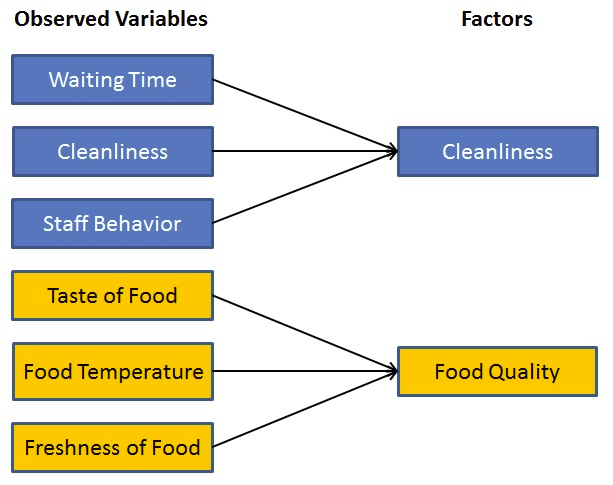





Assumptions ในการทำ Factor Analysis:

* There are no outliers in data.
* Sample size should be greater than the factor.
* There should not be ***perfect multicollinearity***.
* There should not be ***homoscedasticity*** between the variables.

## การทำ Factor Analysis

In [33]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

### แก้ error ```ModuleNotFoundError: No module named 'factor_analyzer'``` โดย https://stackoverflow.com/questions/61830329/modulenotfounderror-no-module-named-factor-analyzer-python-notebook

### วิธี install package อื่นๆ

In [34]:
!pip install factor_analyzer

In [35]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt  # = from matplotlib import pyplot as plt

## Quiz 5 เลือกข้อมูลมาเฉพาะ a1,a2,a3,...,o3,o4,o5 ด้วยคำสั่ง ```.iloc[]```

In [36]:
BFI_data_dropped = BFI_data.iloc[:,1:-3]
BFI_data_dropped

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,1.0,1.0,4.0,5.0,5.0,6.0,1.0,1.0,1.0,NaN,1.0,6.0,1,6.0,6.0,1.0
2796,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,3.0,2.0,2.0,4.0,4.0,3.0,NaN,3.0,2.0,3.0,3.0,6.0,3,5.0,4.0,2.0
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,2.0,2.0,6.0,3.0,6.0,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,2.0,2.0,4.0,5.0,4.0,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


In [37]:
BFI_data_dropped = BFI_data_dropped.dropna()

In [38]:
BFI_data_dropped.shape

(2436, 25)

### Bartlett's test 

In [39]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value = calculate_bartlett_sphericity(BFI_data_dropped)
chi_square_value,p_value

(18170.966350869243, 0.0)

## Kaider - Meyer - Olkin (KMO) Test

 ถ้าค่า KMO model มีค่ามากกว่า 0.6 แปลว่าข้อมูลเหมาะสมที่นำไปทำ Factor Analysis 

In [40]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(BFI_data_dropped)
kmo_model

0.8485397221949221

## Factor Analysis

### import

In [41]:
from factor_analyzer import FactorAnalyzer

### Define

In [42]:
fa = FactorAnalyzer(n_factors=20)

#Fit-transform

In [43]:
data_fa = fa.fit_transform(BFI_data_dropped)

In [44]:
data_fa.shape

(2436, 20)

## วิธีตัดสินใจว่าเราจะลดเหลือกี่ dimention (มี factor ทั้งหมดกี่ตัว)

In [45]:
ev,v = fa.get_eigenvalues()

### ใช้ eigen values

In [46]:
ev 

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

## Scree Plot 

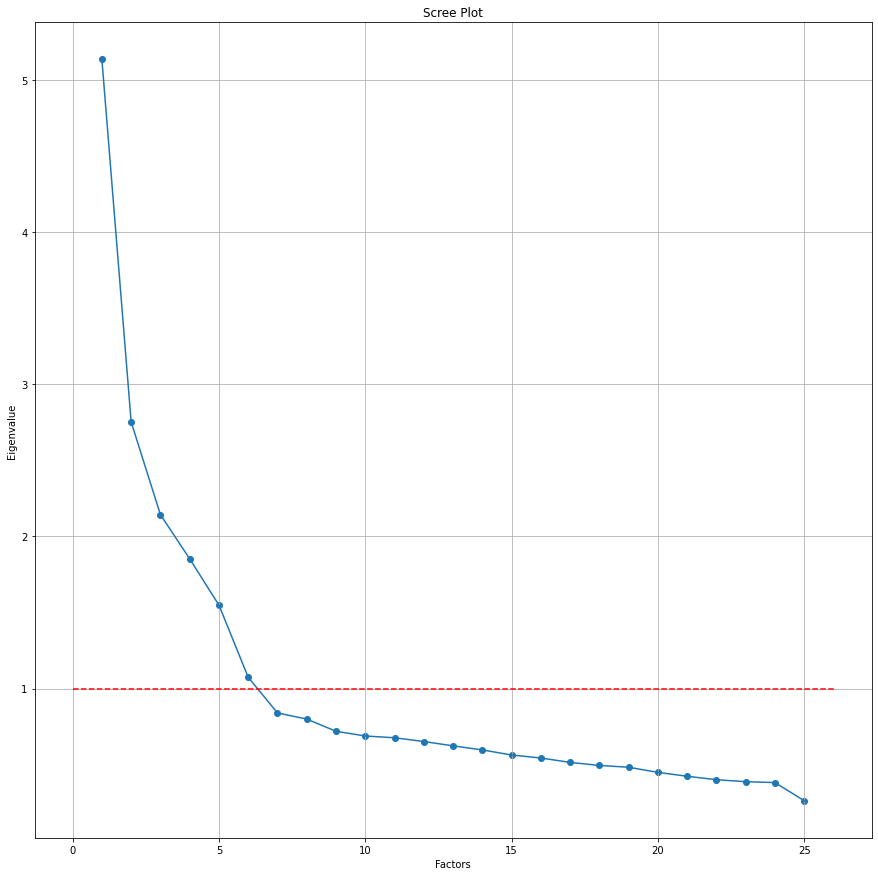

In [47]:
plt.scatter(range(1,BFI_data_dropped.shape[1]+1),ev)
plt.plot(range(1,BFI_data_dropped.shape[1]+1),ev)
plt.plot([0,BFI_data_dropped.shape[1]+1],[1,1],'r--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [48]:
data_fa[:,:6]

array([[-0.89749661, -0.12809666, -1.22649076,  1.08665889,  0.42476701,
         0.03981611],
       [ 0.33679356, -0.15018138, -0.04332274, -0.10339328,  0.29665648,
        -1.11019718],
       [-0.24521029,  0.80409961,  0.39343377, -0.30106518,  0.82703928,
        -0.2982022 ],
       ...,
       [ 0.38724631, -0.02183587,  1.19616826, -1.19357208,  0.79669501,
        -0.95295109],
       [-0.75695976,  0.94984758,  1.24363484, -1.15230215,  2.2534133 ,
        -1.0218667 ],
       [-2.35583952, -1.49829856,  0.49436981, -1.64734311,  0.94742323,
         0.43462495]])

### Factor loading

In [49]:
fa.loadings_.shape #มีตัวแปร 20 ตัว

(25, 20)

## รัน Factor Analyzer อีกรอบ ด้วย พารามิเตอร์ จำนวน Factor เท่ากับ 6

In [50]:
from factor_analyzer import FactorAnalyzer
fa2 = FactorAnalyzer(n_factors=6)
data_fa = fa2.fit_transform(BFI_data_dropped)

In [51]:
fa2.loadings_.shape

(25, 6)

### Plot factor loadings

In [52]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

## matrix plot
 ### confirmatory

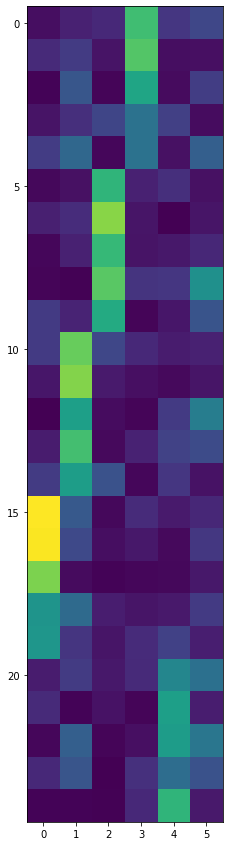

In [53]:
matplotlib.rcParams['figure.figsize']=[15,15]
plt.imshow(np.absolute(fa2.loadings_))

### กราฟแท่ง
Exploratory

In [54]:
BFI_data_dropped.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5'],
      dtype='object')

<BarContainer object of 25 artists>

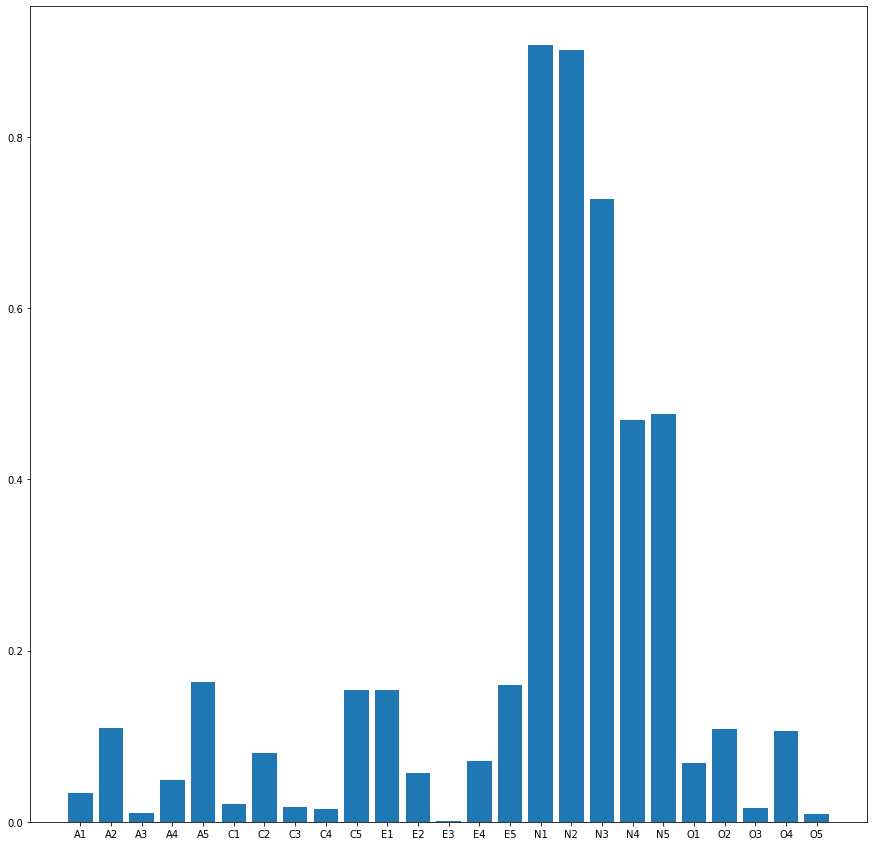

In [55]:
plt.bar(range(25),np.absolute(fa2.loadings_[:,0]),tick_label=BFI_data_dropped.columns)

# Exam 3
  ### ทำ Factor Analysis ข้อมูล Fifa 2018 https://drive.google.com/file/d/1UORRKWMb8GCN455eJE_n9MvBHupnSVwv/view?usp=sharing

### ขั้นตอนแรก นำข้อมูลเข้า

In [92]:
Nu = pd.read_csv('/content/FIFA 2018 Statistics.csv')
Nu.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


### ขั้นตอนต่อมาเลือกข้อมูลที่เราต้องการ สิ่งที่ต้องการคือ Goal - scored ถึง red

In [93]:
Nu.shape

(128, 27)

In [94]:
Nu_drop = Nu.iloc[:,3:20]
Nu_drop

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red
0,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0
1,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0
2,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0
3,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0
4,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1,46,11,1,6,4,4,3,24,5,79,479,148,14,1,0,0
124,2,43,12,4,3,5,4,1,5,5,88,510,108,11,1,0,0
125,0,57,15,5,7,3,5,0,12,2,92,698,110,5,2,0,0
126,4,39,8,6,1,1,2,1,14,1,75,271,99,14,2,0,0


### สามารถดูขนาดของข้อมูล

In [95]:
Nu_drop.shape

(128, 17)

### การใช้ Bartlett's test
          *โดยค่า P-value ที่ได้มาถ้าเข้าใกล้ 0 จะถือว่าดี*

In [96]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value = calculate_bartlett_sphericity(Nu_drop)

chi_square_value, p_value 

(1299.3697851171412, 2.713580160466225e-189)

**จะเห็นได้ว่าค่า P-value มีค่า 2.71 x 10^-189 ซึ่งมีค่าเข้าใกล้ 0 จะถือว่าดี**

### การใช้ Kaiser-Meyer-Olkin (KMO) Test
สังเกตว่าถ้าค่า KMO model มีค่ามากกว่า 0.6 นั่นแปลว่าข้อมูลของเราเหมาะสมที่นำไปทำ Factor Analysis

      

In [97]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(Nu_drop)

kmo_model

0.5594556344508279

**จะเห็นได้ว่าค่า kmo ออกมามีค่าเท่ากับ 0.5594556344508279  ซึ่งมีค่าใกล้เคียง 0.6 แต่ยังไม่ถึง 0.6 ข้อมูลนี้อาจจะไม่เหมาะสมมากนักที่จะนำไปทำ Factor Analysis แต่ถ้าค่า kmo มีค่าน้อยกว่า 0.5 ไม่สามารถทำ Factor Analysis ได้ ในข้อมูลนี้ซึ่งมีค่ามากกว่า 0.5 แต่ไม่ถึง 0.6 เราจึงต้องทำการไปตัด dimension ที่มีค่า correlation สูง ๆ ก่อน จึงจะทำ Factor Analysis ได้**

### การทำ Factor Analysis

### import

In [98]:
from factor_analyzer import FactorAnalyzer

### Define

In [101]:
na = FactorAnalyzer(n_factors=10)

### Fit-transform

In [103]:
data_na = na.fit_transform(Nu_drop)

In [104]:
data_na.shape

(128, 10)

### วิธีตัดสินใจว่าเราจะลดเหลือกี่ dimention (มี factor ทั้งหมดกี่ตัว)

In [105]:
ev,v = na.get_eigenvalues()

### ใช้ eigen values

In [106]:
ev

array([4.93533676, 1.66110682, 1.45898601, 1.31857945, 1.27991548,
       1.1607222 , 0.89822418, 0.80740568, 0.78874612, 0.65948826,
       0.56563441, 0.48116939, 0.38549929, 0.29659929, 0.22859409,
       0.06848785, 0.00550471])

### Scree Plot 

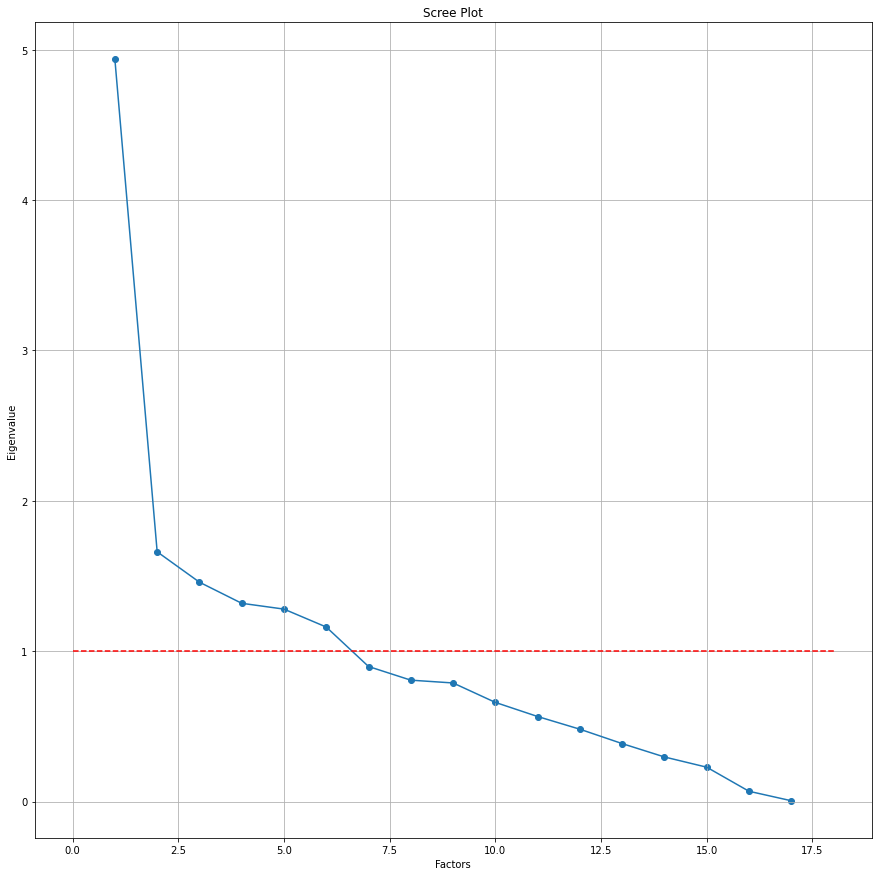

In [108]:
plt.scatter(range(1,Nu_drop.shape[1]+1),ev)
plt.plot(range(1,Nu_drop.shape[1]+1),ev)
plt.plot([0,Nu_drop.shape[1]+1],[1,1],'r--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

 **จากกราฟข้อมูลจะเห็นว่ามี Factor จำนวน 17  Factor แต่มี มีตัวที่มีค่า Factor มากกว่า 1 มีอยู่จำนวน 6 ตัว**

In [109]:
data_na[:,:6]

array([[-1.14061137e+00,  1.05033795e+00,  2.79854567e+00,
         3.57574560e-01, -5.95152711e-02, -7.48334076e-02],
       [ 5.33831171e-01, -1.78150280e-01, -1.10088651e+00,
         1.81432000e-02, -8.36944321e-01, -7.31531607e-01],
       [-7.29379706e-01,  3.96402498e-01, -7.02153492e-01,
        -2.77221903e-01,  1.34345254e-01, -5.61356514e-01],
       [ 7.08580342e-01,  3.36178613e-01, -3.31529441e-01,
        -2.60518967e-01, -1.38667315e+00,  1.34916077e-01],
       [ 3.25530467e-01, -3.71841487e-01, -4.14431700e-01,
         3.27492853e-01,  2.50366459e-01,  2.57255932e-01],
       [-1.34130209e+00, -5.34562069e-01,  2.52429472e-01,
        -5.22235915e-01,  1.05852627e+00, -1.07428697e+00],
       [-5.46867894e-01, -4.92844282e-01,  9.46711298e-01,
        -3.59877314e-01, -1.85391071e-01, -3.25465436e-01],
       [ 1.67488741e+00, -4.32704892e-01,  7.61605381e-01,
        -3.70473849e-01, -8.35201718e-01, -5.88310671e-01],
       [ 2.62530209e-01, -3.24159295e-01,  6.589

### Factor loading

In [110]:
na.loadings_.shape

(17, 10)

### รัน Factor Analyzer อีกรอบ ด้วย พารามิเตอร์ จำนวน Factor เท่ากับ 6

In [111]:
from factor_analyzer import FactorAnalyzer
na = FactorAnalyzer(n_factors=6)
data_na = na.fit_transform(Nu_drop)

In [112]:
na.loadings_.shape 

(17, 6)

### Plot factor loadings

In [113]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

## matrix plot
 confirmatory (ตัวไหนที่เป็นกลุ่มเดียวกัน)

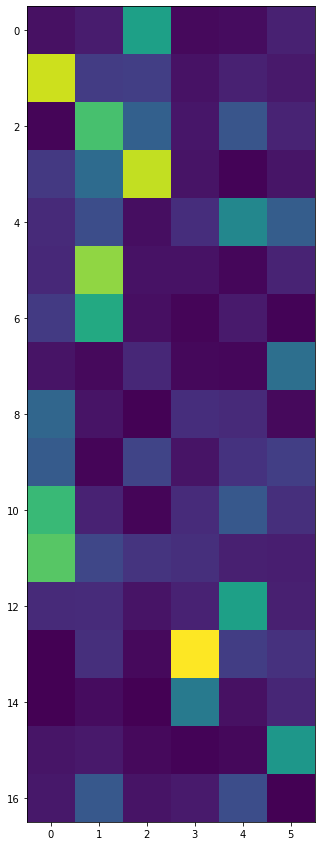

In [114]:
matplotlib.rcParams['figure.figsize']=[15,15] #ขยายกราฟให้มีขนาดใหญ่ขึ้นมากกว่าเดิม
plt.imshow(np.absolute(na.loadings_)) 
#อันไหนมีค่ามากก็จะแสดงผลออกสีสว่าง ๆ ถ้ามีค่าน้อย ๆ จะเป็นสีมืด ๆ 

### กราฟแท่ง
Exploratory

In [115]:
Nu_drop.columns

Index(['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target',
       'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves',
       'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)',
       'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red'],
      dtype='object')

<BarContainer object of 17 artists>

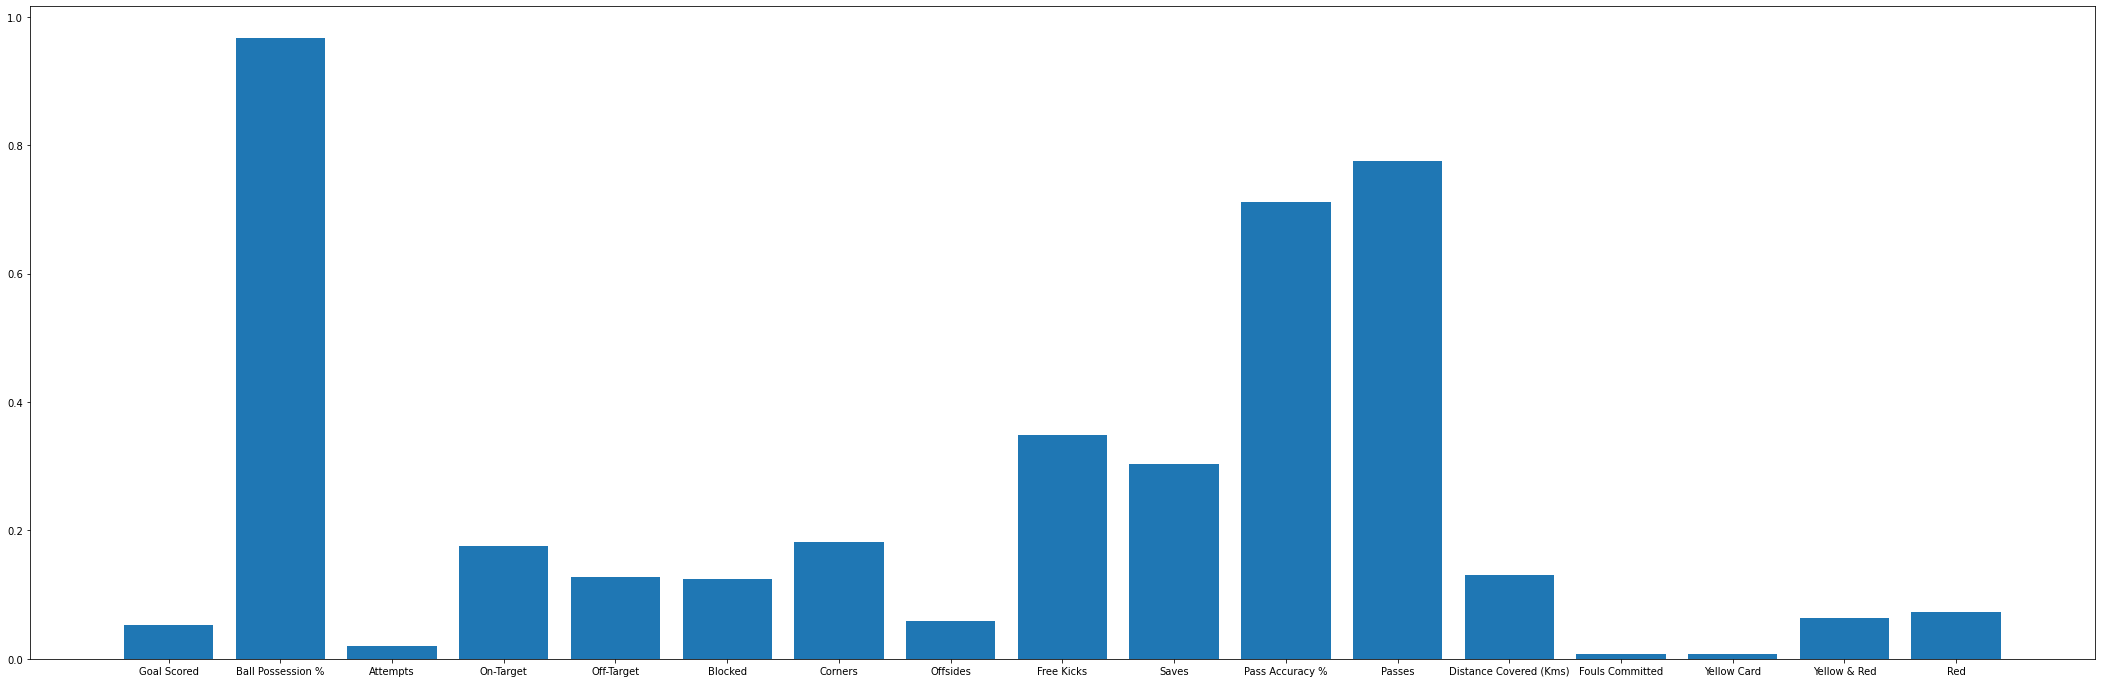

In [129]:
plt.subplots(figsize=(37,12)) #ขยายขนาดของกราฟเเท่ง (ความกว้างเท่ากับ 37 , ความยาวเท่ากับ 12 )
plt.bar(range(17),np.absolute(na.loadings_[:,0]),tick_label=Nu_drop.columns)

**สรุป จากกราฟแท่งทำให้เราสามารถทราบได้ว่าตัวแปรไหนเป็นตัวแปรไหนได้ดีกว่า ซึ่งสามารถทำให้เราดูค่าได้ง่ายกว่าแบบที่เป็น matrix plot เป็นสี ๆ และทำให้ทราบว่าข้อมูลตัวไหนบ้างที่ถูกอธิบายด้วย Factor  ที่อธิบายได้มาก ๆ ซึ่งถ้าดูจากกราฟแล้วจะเห็นกราฟแท่งที่ชื่อว่า Ball Possession % , Passes , Pass Accuracy % , Free Kicks และ Seves**  